In [ ]:
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Midterm 

## 1) Simulation

In [ ]:
# Generate the x values as draws from the multivariate normal distributions
cov   = [[1,    0.4, 0],
         [0.4,  1.5, 0],
         [0,      0, 2]
         ]
mu = [5,2,1]

# 1.1 set numpy seed
np.random.seed(102030)

# 1.2
N = 20
x1, x2, x3 = np.random.multivariate_normal(mu, cov, N).T


## 2) OLS, Bootstrapping and Multicollineratity

In [ ]:
# 2.1 true process
# set seed again
np.random.seed(102030)
y = 10 + x1 + 5*x2 + np.random.normal(loc=0,scale=1,size=N)

In [ ]:
# 2.2) OLS
x = np.c_[np.ones(N),x1,x2,x3]
ols_model = sm.OLS(y,x).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     410.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.43e-15
Time:                        09:22:19   Log-Likelihood:                -18.023
No. Observations:                  20   AIC:                             44.05
Df Residuals:                      16   BIC:                             48.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1132      0.736     15.100      0.000       9.553      12.673
x1             0.7362      0.166      4.424      0.000       0.383       1.089
x2             5.0497      0.176     28.652      0.000       4.676       5.423
x3             0.3345      0.103      3.253      0.005       0.117       0.553
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.101
Skew:                          -0.081   Prob(JB):                        0.577
Kurtosis:                       1.862   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2.3) parameter estimates are listed above. All have significant p values. $\beta_0$,  $\beta_1$, $\beta_2$, and $\beta_3$ are close to the true values, but not exactly. 

95% intervals are given in the last two columns. 



In [ ]:
# 2.4 and 2.5 below
B = 1000
a_bootstrapped=[]
b1_bootstrapped=[]
b2_bootstrapped=[]
b3_bootstrapped=[]
for b in range(B):    
    # sampling (only an index) with replacement
    indx_boot = np.random.choice(x.shape[0], size=N)
    
    # use the index to sample (with replacement) x and y
    yb   = y[indx_boot]    
    xb   = x[indx_boot,:]
    
    # expand the dimension to get a matrix of sixe N x 1
    # so we can use matrix maltiplication later on
    #xb = xb[:,None]
    yb = yb[:,None]

    # get OSL estimate via matrix formula (X'X)^(-1)X'y
    betas = np.dot(np.linalg.inv(np.dot(xb.T,xb)),np.dot(xb.T,yb))
    a_b = betas[0,0]
    b1_b = betas[1,0]
    b2_b = betas[2,0]
    b3_b = betas[3,0]
    

    # append estimate
    a_bootstrapped.append(a_b)
    b1_bootstrapped.append(b1_b)
    b2_bootstrapped.append(b2_b)
    b3_bootstrapped.append(b3_b)

2.6) Plotting histograms

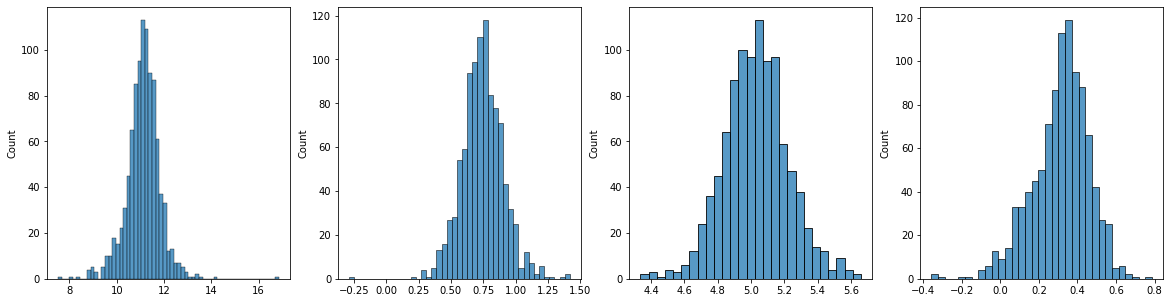

In [ ]:
#2.6)
fig, ax = plt.subplots(1,4, figsize=(20,5))
sns.histplot(a_bootstrapped,ax=ax[0])
sns.histplot(b1_bootstrapped,ax=ax[1])
sns.histplot(b2_bootstrapped,ax=ax[2])
sns.histplot(b3_bootstrapped,ax=ax[3])
plt.show()

2.6) Pretty much the same picture as OLS estimates, i.e. true values are within the bootstrap estimates.  

2.8) For N = 1000 things look much better. Both the OLS and bootstrap estimates recover the true parameters. A bit off for $\beta_3$ 

In [ ]:
# 2.9) new model spec.
x = np.c_[np.ones(N),x1,x2,(x1+x2)/2]
ols_model = sm.OLS(y,x).fit()
ols_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     390.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           6.20e-15
Time:                        09:22:54   Log-Likelihood:                -23.099
No. Observations:                  20   AIC:                             52.20
Df Residuals:                      17   BIC:                             55.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4006      0.914     12.478      0.000       9.473      13.328
x1            -0.2526      0.192     -1.313      0.207      -0.658       0.153
x2             4.1368      0.201     20.628      0.000       3.714       4.560
x3             1.9421      0.075     25.865      0.000       1.784       2.101
==============================================================================
Omnibus:                        9.839   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.213
Skew:                           1.206   Prob(JB):                       0.0271
Kurtosis:                       4.685   Cond. No.                     2.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

2.9) Statsmodels suggests that an eigenvalue is 0, which indicates multicollinearity.

2.10) We can fix the problem by i) removing one of the covariates, or ii) use a regularization method, e.g. lasso.

## 3) Timeseries and model selection

In [ ]:
# load data
nile = sm.datasets.get_rdataset("Nile").data

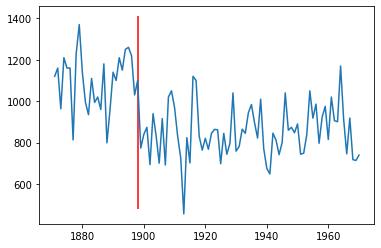

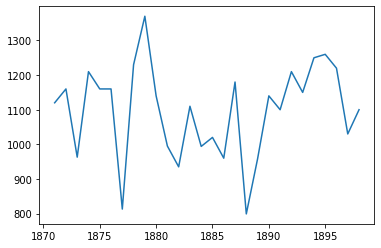

In [ ]:
# 3.1) plot
plt.plot(nile.time,nile.value)
plt.vlines(x=1898,ymin=480,ymax=1410,color='r')
plt.show()

plt.plot(nile.time[nile.time<=1898],nile.value[nile.time<=1898])
plt.show()

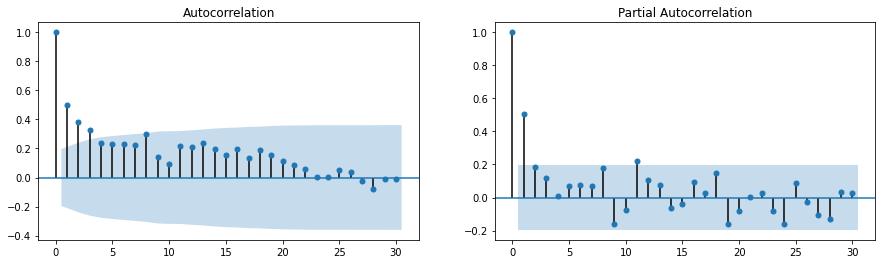

In [ ]:
# 3.2)  ACF and PAC
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
y = nile.value[nile.time<=1898]
y = nile.value
fig, axs = plt.subplots(1,2,figsize=(15,4))
plot_acf(y, lags=30, ax=axs[0])
plot_pacf(y, lags=30, ax=axs[1])
plt.show()

3.3) The average annual flow seems to change in 1898. After that year the average flow decreased, which suggests that the data is time-dependent. The ACF is taillingoff and the PACF cuts off after lag 1.

3.4) Based on 3.3) the model should be AR(1)

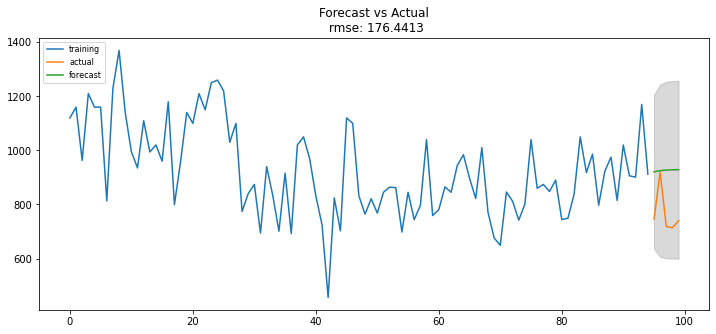

In [ ]:
# forecasting
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

y_tr = nile.value[:95]
y_te = nile.value[95:]

#define an AR(1) model
model = ARIMA(y_tr, order=(1,0,0)).fit()

# Forecast
horizon = y_te.shape[0]
fc,se,conf = model.forecast(horizon)
forecast = pd.Series(fc, index=y_te.index)
lower_bound = pd.Series(conf[:, 0], index=y_te.index)
upper_bound = pd.Series(conf[:, 1], index=y_te.index)

rmse = np.mean((forecast - y_te)**2)**0.5

plt.figure(figsize=(12,5))
plt.plot(y_tr, label='training')
plt.plot(y_te, label='actual')
plt.plot(forecast, label='forecast')
plt.fill_between(lower_bound.index, lower_bound, upper_bound, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actual\n rmse: {:.4f}'\
            .format(rmse))
plt.legend(loc='upper left', fontsize=8)
plt.show()

3.5) rmse = 176.44 as indicated in the above diagram

In [ ]:
# 3.6) define all AR(p) models
orders = [(1,0,0),(2,0,0),(3,0,0),(4,0,0),(5,0,0)]

print('Filling out table 3')
for order in orders:
  model = ARIMA(y_tr, order=order).fit()

  # Forecast
  horizon = y_te.shape[0]
  fc,se,conf = model.forecast(horizon)
  forecast = pd.Series(fc, index=y_te.index)

  rmse = np.mean((forecast - y_te)**2)**0.5
  print('rmse for model {0} is {1:.4f} and aic {2:.4f}'\
        .format(order,rmse,model.aic))

Filling out table 3
rmse for model (1, 0, 0) is 176.4413 and aic 1222.3875
rmse for model (2, 0, 0) is 198.1999 and aic 1220.1083
rmse for model (3, 0, 0) is 199.4829 and aic 1221.1284
rmse for model (4, 0, 0) is 201.1570 and aic 1222.9752
rmse for model (5, 0, 0) is 207.6714 and aic 1223.7775


3.7) No, based on rmse we select AR(1), while AIC selects AR(2). 

## 4) Classification and PCA

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


I load the dataset by first mounting my gdrive and then reading it from there. Replace the path, or even the function, in `read_csv` with your own one.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./gdrive/MyDrive/Colab Notebooks/santander_dataset.csv',sep=',')
y = df[['target']]
x = df.drop(['ID_code', 'target'], axis=1)

In [ ]:
# 4.1) 
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3)
for train, test in sss.split(x,y):
  x_tr, x_te   = x.iloc[train], x.iloc[test]
  y_tr, y_te   = y.iloc[train], y.iloc[test]

classifier = sm.Logit(y_tr,sm.add_constant(x_tr)).fit(disp=0)
fpr,tpr,thresholds = metrics.roc_curve(y_te,classifier.predict(sm.add_constant(x_te)))
roc_auc = metrics.auc(fpr, tpr)
print('auc in the test dataset: {:.4f}'.format(roc_auc))

auc in the test dataset: 0.8600


In [ ]:
# 4.2
Ks = 5
kfolds = KFold(n_splits=Ks)

aucs = []
for j, (train,test) in  enumerate(kfolds.split(x,y=y)):
  # define and fit the model in statsmodels
  classifier = sm.Logit(y.iloc[train],sm.add_constant(x.iloc[train])).fit(disp=0)
    
  fpr,tpr,thresholds = metrics.roc_curve(y.iloc[test],classifier.predict(sm.add_constant(x.iloc[test])))
  roc_auc = metrics.auc(fpr, tpr)
  
  aucs.append(roc_auc)

print('Average AUC: {0:.4f} with std {1:.4f}'.format(np.mean(aucs),np.std(aucs)))

Average AUC: 0.8595 with std 0.0033


In [ ]:
from sklearn.decomposition import PCA

components = [20,50,100,180]
print('Filling out table 2')
for component in components:
  aucs = []
  pca = PCA(n_components=component)
  x_reduced = pca.fit_transform(x)
  kfolds = KFold(n_splits=Ks)
  for j, (train,test) in  enumerate(kfolds.split(x_reduced,y=y)):
    # define and fit the model in statsmodels
    classifier = sm.Logit(y.iloc[train],sm.add_constant(x_reduced[train,:])).fit(disp=0)
    
    fpr,tpr,thresholds = metrics.roc_curve(y.iloc[test],classifier.predict(sm.add_constant(x_reduced[test,:])))
    roc_auc = metrics.auc(fpr, tpr)
  
    aucs.append(roc_auc)

  print('Using {0} components the average AUC: {1:.4f} with std {2:.4f}'.format(component,np.mean(aucs),np.std(aucs)))

Filling out table 2
Using 20 components the average AUC: 0.6095 with std 0.0036
Using 50 components the average AUC: 0.7039 with std 0.0036
Using 100 components the average AUC: 0.7757 with std 0.0030
Using 180 components the average AUC: 0.8429 with std 0.0032


4.5) The model performance from 4.1 is based on one test, hence we cannot be certain. k-fold cross-validation is a relatively more robust method. However, we should be carefull that the number of obs from $y=1$ is enough in the test fold. Dimensionality reduction seems to loose a lot of disciminative information, which is valuable for classification- Even when using 180 components the AUC drops, compared with the original data. The advice is to use the model trained with the original data.